# Happiness Rank 2015

In [1]:
# Import tools to work with data frame
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

# convert csv to data frame
df = pd.read_csv('C:\\Users\\britt\\Downloads\\Happiness dataset\\output.csv')

#clean data to look at the year 2015
df_2015 = df[:158]

# Is GDP a good indicator of a high happiness ranking?

In [2]:
# pull top 25 happiest countries
top25_df = df_2015.head(25)

# sort by GDP per capita
top25_economysort = top25_df.sort_values(by=['Economy (GDP per Capita)'])
print(top25_economysort[['Country','Happiness Rank','Economy (GDP per Capita)']])


                 Country  Happiness Rank  Economy (GDP per Capita)
11            Costa Rica            12.0                   0.95578
15                Brazil            16.0                   0.98124
13                Mexico            14.0                   1.02054
22             Venezuela            23.0                   1.04424
24                Panama            25.0                   1.06353
10                Israel            11.0                   1.22857
8            New Zealand             9.0                   1.25018
20        United Kingdom            21.0                   1.26637
5                Finland             6.0                   1.29025
1                Iceland             2.0                   1.30232
18               Belgium            19.0                   1.30782
2                Denmark             3.0                   1.32548
4                 Canada             5.0                   1.32629
6            Netherlands             7.0                   1.3

In [3]:
# What is the max GDP per capita and what is that countries happiness rank?
econsort = df_2015.sort_values(by=['Economy (GDP per Capita)'], ascending=False)
econsort.head(1)

print(econsort[['Country','Happiness Rank','Economy (GDP per Capita)']].head(25))

                 Country  Happiness Rank  Economy (GDP per Capita)
27                 Qatar            28.0                   1.69042
16            Luxembourg            17.0                   1.56391
38                Kuwait            39.0                   1.55422
23             Singapore            24.0                   1.52186
3                 Norway             4.0                   1.45900
19  United Arab Emirates            20.0                   1.42727
0            Switzerland             1.0                   1.39651
34          Saudi Arabia            35.0                   1.39541
14         United States            15.0                   1.39451
71             Hong Kong            72.0                   1.38604
21                  Oman            22.0                   1.36011
12               Austria            13.0                   1.33723
17               Ireland            18.0                   1.33596
9              Australia            10.0                   1.3

In [4]:
# Take mean and compare it to the GDP of the top 25
Econmean = df_2015[['Economy (GDP per Capita)']].mean()
Econstd = df_2015[['Economy (GDP per Capita)']].std()

# Calculates the Statistic z-score
top25_df[['Economy Z_Score25']] = (top25_df[['Economy (GDP per Capita)']] - Econmean) / Econstd

print(top25_df[['Country','Happiness Rank','Economy (GDP per Capita)','Economy Z_Score25']])

                 Country  Happiness Rank  Economy (GDP per Capita)  \
0            Switzerland             1.0                   1.39651   
1                Iceland             2.0                   1.30232   
2                Denmark             3.0                   1.32548   
3                 Norway             4.0                   1.45900   
4                 Canada             5.0                   1.32629   
5                Finland             6.0                   1.29025   
6            Netherlands             7.0                   1.32944   
7                 Sweden             8.0                   1.33171   
8            New Zealand             9.0                   1.25018   
9              Australia            10.0                   1.33358   
10                Israel            11.0                   1.22857   
11            Costa Rica            12.0                   0.95578   
12               Austria            13.0                   1.33723   
13                Me

C:\Users\britt\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(array([ 7., 17., 14., 14., 19., 24., 26., 26.,  7.,  4.]),
 array([0.      , 0.169042, 0.338084, 0.507126, 0.676168, 0.84521 ,
        1.014252, 1.183294, 1.352336, 1.521378, 1.69042 ]),
 <BarContainer object of 10 artists>)

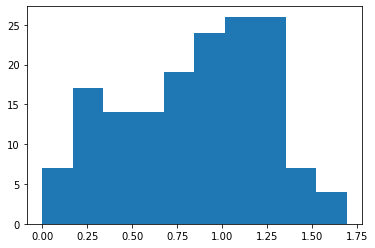

In [5]:
#plot histogram for GPD per capita
pyplot.hist(df_2015[['Economy (GDP per Capita)']])


C:\Users\britt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness Rank', ylabel='Economy (GDP per Capita)'>

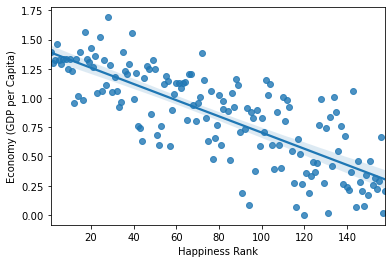

In [6]:
#scatter plot with linear regression line
sns.regplot(df_2015[['Happiness Rank']], df_2015[['Economy (GDP per Capita)']])

C:\Users\britt\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:xlabel='Happiness Rank', ylabel='Economy Z_Score'>

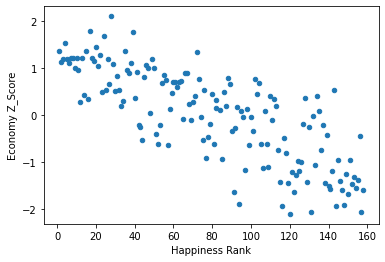

In [7]:
# Plot the happiness rank by z-score
df_2015[['Economy Z_Score']] = (df_2015[['Economy (GDP per Capita)']] - Econmean) / Econstd

df_2015.plot.scatter(x='Happiness Rank', y='Economy Z_Score')

Notes:
There is a trend between GDP per capita and the happiness ranking of a country. Nearly all those in the top 25 are a standard deviation higher than the mean of all the countries measured. From the scatter plot, a correlation is present, but it is not extraordinarily clear as there is still quite a range from the line of best fit.

# What is the biggest predictor of ranking low in the Happiness Rank?

In [8]:
# pull bottom 50
bottom50 = df_2015[-50:]
# count number of countries per region
bottom50[['Region','Country']].groupby('Region').count()


,Country
Region,
Central and Eastern Europe,4
Latin America and Caribbean,1
Middle East and Northern Africa,5
Southeastern Asia,2
Southern Asia,5
Sub-Saharan Africa,33


In [9]:
# compare to number countries per region in the dataset
df_2015[['Region','Country']].groupby('Region').count()

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


In [10]:
# bottom 50 number of countries per region
bottom50_count = pd.DataFrame(bottom50[['Region','Country']].groupby('Region').count())
b50_count = bottom50_count.reset_index()

# countries per region whole list with Happiness rankings
reg_country_count = df_2015[['Region','Country']].groupby('Region').count()
region_country_count = reg_country_count.reset_index()


In [11]:
# calculation the proportion of countries in a region in the bottom 50 of happiness
t_dict = {}

for row in b50_count[['Region']].values:
    region = row[0]
    t_dict[region] = b50_count[b50_count['Region'] == region]['Country'].values[0] / region_country_count[region_country_count['Region'] == region]['Country'].values[0]
    

In [12]:
# add to b50_count table
b50_count['Proportion of region'] = t_dict.values()
b50_count.rename(columns={'Country':'Country Count'}) 

,Region,Country Count,Proportion of region
0,Central and Eastern Europe,4,0.137931
1,Latin America and Caribbean,1,0.045455
2,Middle East and Northern Africa,5,0.250000
3,Southeastern Asia,2,0.222222
4,Southern Asia,5,0.714286
5,Sub-Saharan Africa,33,0.825000


In [13]:
# Look at other factors taken into consideration when calculating the happiness ranking
# build table to add features

b50_factors = bottom50[['Region','Country','Happiness Rank','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']].sort_values(by=['Region'])

print(b50_factors)

                              Region                   Country  \
110       Central and Eastern Europe                   Ukraine   
129       Central and Eastern Europe                   Georgia   
133       Central and Eastern Europe                  Bulgaria   
126       Central and Eastern Europe                   Armenia   
118      Latin America and Caribbean                     Haiti   
134  Middle East and Northern Africa                     Egypt   
109  Middle East and Northern Africa                      Iran   
111  Middle East and Northern Africa                      Iraq   
155  Middle East and Northern Africa                     Syria   
135  Middle East and Northern Africa                     Yemen   
128                Southeastern Asia                   Myanmar   
144                Southeastern Asia                  Cambodia   
120                    Southern Asia                     Nepal   
131                    Southern Asia                 Sri Lanka   
152       

In [14]:
# Find mean and STD of health
health_mean = df_2015[['Health (Life Expectancy)']].mean()
health_std = df_2015[['Health (Life Expectancy)']].std()

# Find mean and STD of Freedom
free_mean = df_2015[['Freedom']].mean()
free_std = df_2015[['Freedom']].std()

# Find mean and STD of Trust

trust_mean = df_2015[['Trust (Government Corruption)']].mean()
trust_std = df_2015[['Trust (Government Corruption)']].std()

In [15]:
# find the z-scores for each feature

# Health z-score
b50_factors[['Health (Life Expectancy) z-score']] = (b50_factors[['Health (Life Expectancy)']] - health_mean) / health_std

# Freedom z-score
b50_factors[['Freedom z-score']] = (b50_factors[['Freedom']] - free_mean) / free_std

# Trust z-score
b50_factors[['Trust (Government Corruption) z-score']] = (b50_factors[['Trust (Government Corruption)']] - trust_mean) / trust_std

In [16]:
# View z-scores in table

print(b50_factors[['Region','Country','Health (Life Expectancy) z-score','Freedom z-score','Trust (Government Corruption) z-score']])

                              Region                   Country  \
110       Central and Eastern Europe                   Ukraine   
129       Central and Eastern Europe                   Georgia   
133       Central and Eastern Europe                  Bulgaria   
126       Central and Eastern Europe                   Armenia   
118      Latin America and Caribbean                     Haiti   
134  Middle East and Northern Africa                     Egypt   
109  Middle East and Northern Africa                      Iran   
111  Middle East and Northern Africa                      Iraq   
155  Middle East and Northern Africa                     Syria   
135  Middle East and Northern Africa                     Yemen   
128                Southeastern Asia                   Myanmar   
144                Southeastern Asia                  Cambodia   
120                    Southern Asia                     Nepal   
131                    Southern Asia                 Sri Lanka   
152       

<AxesSubplot:xlabel='Happiness Rank', ylabel='Trust (Government Corruption) z-score'>

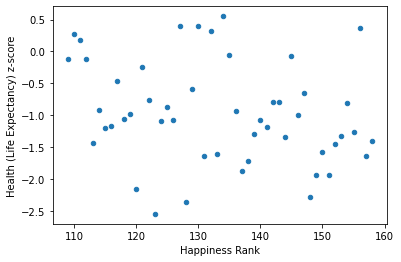

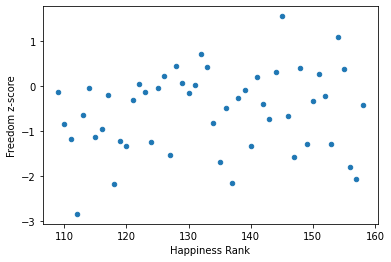

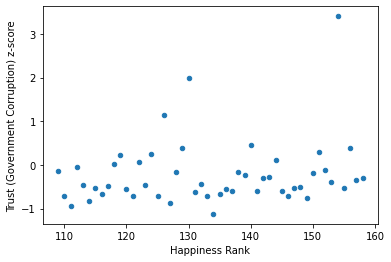

In [17]:
# Plot scatterplots of bottom 50 countries by Health, Freedom, and Trust of Government
b50_factors.plot.scatter(x='Happiness Rank', y='Health (Life Expectancy) z-score')

b50_factors.plot.scatter(x='Happiness Rank', y='Freedom z-score')

b50_factors.plot.scatter(x='Happiness Rank', y='Trust (Government Corruption) z-score')

In [18]:
# Compare it to the whole set of data

# find the z-scores for each feature

# Health z-score
df_2015[['Health (Life Expectancy) z-score']] = (df_2015[['Health (Life Expectancy)']] - health_mean) / health_std

# Freedom z-score
df_2015[['Freedom z-score']] = (df_2015[['Freedom']] - free_mean) / free_std

# Trust z-score
df_2015[['Trust (Government Corruption) z-score']] = (df_2015[['Trust (Government Corruption)']] - trust_mean) / trust_std

C:\Users\britt\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(array([ 7.,  4., 11., 13.,  8., 17., 24., 38., 24., 12.]),
 array([0.      , 0.102525, 0.20505 , 0.307575, 0.4101  , 0.512625,
        0.61515 , 0.717675, 0.8202  , 0.922725, 1.02525 ]),
 <BarContainer object of 10 artists>)

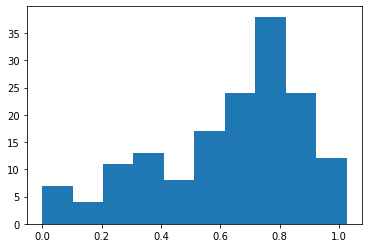

In [19]:
# Check for distribution type (normal, skewed, etc)
# histogram plot for Life Expectancy
pyplot.hist(df_2015[['Health (Life Expectancy)']])

(array([ 1.,  6.,  5., 16., 16., 18., 30., 21., 21., 24.]),
 array([0.      , 0.066973, 0.133946, 0.200919, 0.267892, 0.334865,
        0.401838, 0.468811, 0.535784, 0.602757, 0.66973 ]),
 <BarContainer object of 10 artists>)

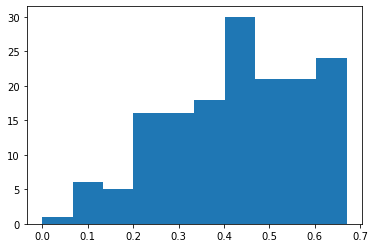

In [20]:
#histogram for Freedom
pyplot.hist(df_2015[['Freedom']])

(array([33., 48., 32., 16.,  4., 10.,  6.,  5.,  2.,  2.]),
 array([0.      , 0.055191, 0.110382, 0.165573, 0.220764, 0.275955,
        0.331146, 0.386337, 0.441528, 0.496719, 0.55191 ]),
 <BarContainer object of 10 artists>)

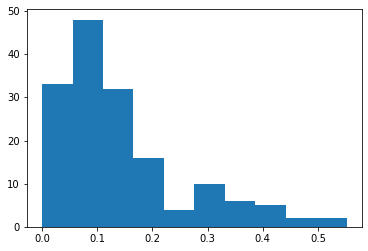

In [21]:
#histogram plot for Trust (Government Corruption)
pyplot.hist(df_2015[['Trust (Government Corruption)']])

<AxesSubplot:xlabel='Happiness Rank', ylabel='Trust (Government Corruption) z-score'>

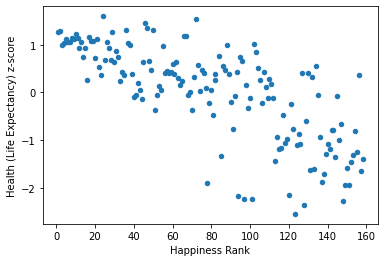

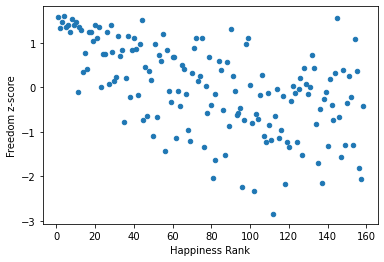

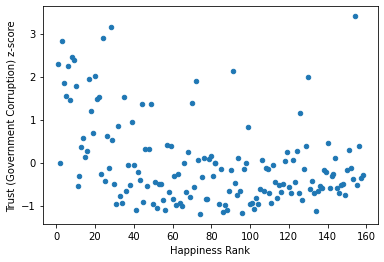

In [22]:
# plot the whole list for each additional feature
df_2015.plot.scatter(x='Happiness Rank', y='Health (Life Expectancy) z-score')

df_2015.plot.scatter(x='Happiness Rank', y='Freedom z-score')

df_2015.plot.scatter(x='Happiness Rank', y='Trust (Government Corruption) z-score')

Notes:
It appears that countries of Sub-Saharan Africa are generally more unhappy than other regions. Upon further examination of features, it is clear that Health (Life Expectancy) holds the strongest correlation. When looking at the last 50 on the Happiness Rank, the plots are generally inconclusive. When the scope is broadened to the whole list, there is a trend in all three categories. Having higher life expectancy and higher freedom, people tend to be happier. Surprisingly, trust/government corruption was relatively average for most of the sample, including the lowest ranking countries in happiness.